In [49]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm_notebook
from sklearn.metrics import accuracy_score, mean_squared_error

In [65]:
class SigmoidNeuron:
    
    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T) + self.b
    
    def sigmoid(self,x):
        return 1.0 / (1.0 + np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*(y_pred)*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*(y_pred)*(1-y_pred)
    
    def fit(self,X,Y,epochs=1, learning_rate=1,initialize=True,display_loss = False):
        #init 
        if initialize:
            self.w = np.random.randn(1, X.shape[1])
            self.b = 0
        
        if display_loss:
            loss = {}
        
        for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):
            dw = 0
            db = 0
            for x,y in zip(X,Y):
                dw += self.grad_w(x,y)
                db += self.grad_b(x,y)
            self.w -= learning_rate * dw
            self.b -= learning_rate * db
            
            if display_loss:
                Y_pred = self.sigmoid(self.perceptron(X))
                loss[i] = mean_squared_error(Y_pred,Y)
        
        if display_loss:
            plt.plot(loss.values())
            plt.xlabel('Epochs')
            plt.ylabel('Mean Squared Error')
            plt.show()
                
             
    def predict(self,X):
        Y_pred = []
        for x in X:
            y_pred = self.sigmoid(self.perceptron(x))
            Y_pred.append(y_pred)
        return np.array(Y_pred)

In [66]:
X = np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y = [1,1,1,0,0,0]

<ipython-input-65-0cd2cc235a2a>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):


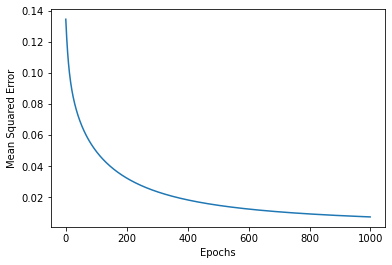

In [68]:
sg = SigmoidNeuron()
sg.fit(X,Y,1000,0.015,True,True)

In [69]:
sg.w,sg.b

(array([[ 1.77779001, -0.58077523]]), array([-0.72292144]))

In [70]:
my_cmap = matplotlib.colors.LinearSegmentedColormap.from_list(" ",['red','yellow','green'])

In [71]:
def plot_sn(X,Y,sn,ax):
    X1 = np.linspace(-10,10,100)
    X2 = np.linspace(-10,10,100)
    XX1, XX2 = np.meshgrid(X1,X2)
    YY = np.zeros(XX1.shape)
    for i in range(X2.size):
        for j in range(X1.size): 
            val = np.asarray([X1[j],X2[i]])
            YY[i,j] = sn.sigmoid(sn.perceptron(val))
    ax.contourf(XX1,XX2,YY ,alpha = 0.6,cmap=my_cmap)
    ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
    ax.plot()

<ipython-input-65-0cd2cc235a2a>:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(epochs),total=epochs,unit='epochs'):



[[1.35547105 0.40447974]] [0.00584684]



[[1.41101293 0.05046954]] [0.05946226]



[[ 1.37866618 -0.29232602]] [0.02273662]



[[ 1.34970465 -0.5508277 ]] [-0.04616937]



[[ 1.43804954 -0.43766073]] [-0.09635491]



[[ 1.4553914  -0.51102229]] [-0.14386144]



[[ 1.49964804 -0.49514035]] [-0.1845236]



[[ 1.52864912 -0.51494185]] [-0.22248534]



[[ 1.55977195 -0.52165789]] [-0.25711644]



[[ 1.58779199 -0.53125162]] [-0.28922642]



[[ 1.61439675 -0.53955424]] [-0.31901835]



[[ 1.63946057 -0.54750805]] [-0.34678182]



[[ 1.663187   -0.55502286]] [-0.37273836]



[[ 1.68570401 -0.56215555]] [-0.39708115]



[[ 1.70712688 -0.56894148]] [-0.41997584]



[[ 1.72755541 -0.57541224]] [-0.44156559]



[[ 1.74707669 -0.58159539]] [-0.46197471]



[[ 1.76576709 -0.58751518]] [-0.48131168]



[[ 1.78369394 -0.59319295]] [-0.49967158]



[[ 1.80091685 -0.59864764]] [-0.51713813]


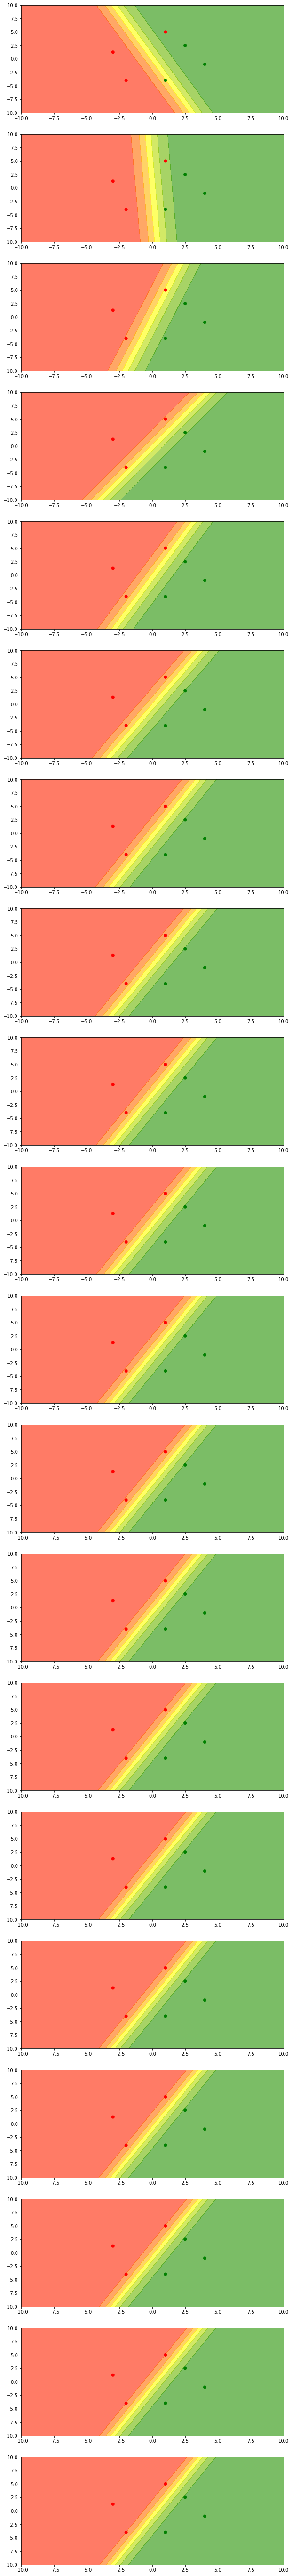

In [72]:
sg.fit(X,Y,1,0.05,True)
N = 20
plt.figure(figsize=(10,N*5))
for i in range(N):
    print(sg.w,sg.b)
    ax = plt.subplot(N,1,i+1)
    plot_sn(X,Y,sg,ax)
    sg.fit(X,Y,1,0.5,False)